In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### Reading data

In [2]:
df = pd.read_csv('Country-data.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

### Correlation Matrix

<AxesSubplot:>

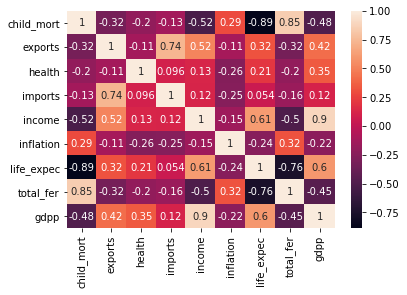

In [3]:
correlations = df.corr()
sb.heatmap(correlations, annot=True, xticklabels=correlations.columns.values, yticklabels=correlations.columns.values)

In [4]:
correlations

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

In [5]:
upper = correlations.where(np.triu(np.ones(correlation.shape),k=1).astype(bool))
upper

NameError: name 'correlation' is not defined

In [17]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.87)]
df.drop(df[to_drop], axis=1)

NameError: name 'upper' is not defined

### The feature with highest correlation

In [160]:
print(to_drop)

[]


In [161]:
columns = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer']
features = df[columns]

### Normalizing all the columns

In [162]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

CT = ColumnTransformer([('', StandardScaler(), ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer'])], remainder='passthrough')

normalized_data = CT.fit_transform(features)
normalized_data

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  0.15733622,
        -1.61909203,  1.90288227],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.31234747,
         0.64786643, -0.85997281],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.78927429,
         0.67042323, -0.0384044 ],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.40973191,
         0.28695762, -0.66120626],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.50091625,
        -0.34463279,  1.14094382],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  0.59001454,
        -2.09278484,  1.6246091 ]])

### Applying elbow method

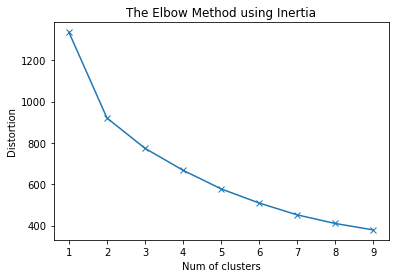

In [163]:
distortions=[]
for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++',n_init=9,max_iter=200,random_state=0)
    km.fit(normalized_data)
    distortions.append(km.inertia_)
plt.plot(range(1,10), distortions , linestyle='solid', marker='x')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Num of clusters')
plt.ylabel('Distortion')
plt.show()

### Applying kmeans with optimum k

In [179]:
kmeans = KMeans(n_clusters=2, random_state=42)
pred=kmeans.fit_predict(normalized_data)

### Counting silhoutte score for the clustering 

In [180]:
score = silhouette_score(normalized_data, km.labels_, metric='euclidean')
score

0.22519793906727176

In [181]:
df=pd.DataFrame(normalized_data, columns = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer'])

### Choosing 3 arbitrary clusters 

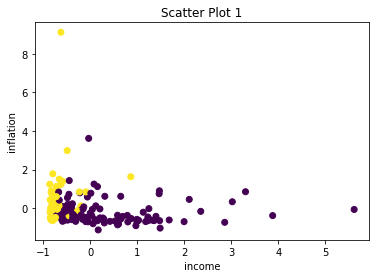

In [182]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
income = df['income']
inflation = df['inflation']
plt.title('Scatter Plot 1')
plt.xlabel('income')
plt.ylabel('inflation')
plt.scatter(x=income, y=inflation ,c = pred)
plt.show()

In [183]:
inflation = df['inflation']
health = df['health']
plt.title('Scatter Plot 2')
plt.xlabel('inflation')
plt.ylabel('health')
plt.scatter(x=inflation, y=health ,c = pred)
plt.show()

In [184]:
income = df['income']
health = df['health']
plt.title('Scatter Plot 3')
plt.xlabel('income')
plt.ylabel('health')
plt.scatter(x=income, y=health ,c = pred)
plt.show()